In [1]:
!pip install pandas pyarrow
import pandas as pd

# Path to the parquet file
file_path = "C:/Users/hp/Downloads/train.gzip"

# Load the parquet file into a DataFrame
df = pd.read_parquet(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()


,user_id,text,sentiment
0,AEWQ5UAND2MOS5TCF4BGQ5PR5SNQ,Great sunglasses. Durable plastic and quality ...,positive
1,AHKZ4BQC547IGCBEOILUIPZLTMVA,Well made,positive
2,AHGPF5N6HCBFLVNSHTSQTXUSFVNA,My husband loves it. He might actually be more...,positive
3,AHLEVG6SCVI376UGJ57FLILRNMVQ,I love this. I bought this on a whim because I...,positive
4,AHF3733K32ZHTZJRZL6NYE5JJDDQ,Don't let the negative reviews change your min...,positive


In [2]:
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
# Download stopwords and punkt if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Function to clean and tokenize text
def clean_and_tokenize_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords and tokenize
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

In [4]:
# Clean and tokenize the text data
df['cleaned_text'] = df['text'].apply(clean_and_tokenize_text)

C:\Users\hp\AppData\Local\Temp\ipykernel_26188\1045414053.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
C:\Users\hp\AppData\Local\Temp\ipykernel_26188\1045414053.py:4: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [5]:
# Display the first few rows of the DataFrame with tokens
print(df.head())


                        user_id  \
0  AEWQ5UAND2MOS5TCF4BGQ5PR5SNQ   
1  AHKZ4BQC547IGCBEOILUIPZLTMVA   
2  AHGPF5N6HCBFLVNSHTSQTXUSFVNA   
3  AHLEVG6SCVI376UGJ57FLILRNMVQ   
4  AHF3733K32ZHTZJRZL6NYE5JJDDQ   

                                                text sentiment  \
0  Great sunglasses. Durable plastic and quality ...  positive   
1                                          Well made  positive   
2  My husband loves it. He might actually be more...  positive   
3  I love this. I bought this on a whim because I...  positive   
4  Don't let the negative reviews change your min...  positive   

                                        cleaned_text  
0  great sunglasses durable plastic quality polar...  
1                                          well made  
2  husband loves might actually proud cowboys rin...  
3  love bought whim didnt crop tops wanted jump h...  
4  dont let negative reviews change mind super cu...  


In [6]:
# Keep only the desired columns
df = df[['user_id', 'cleaned_text', 'sentiment']]

# Rename the 'tokens' column to 'text'
df = df.rename(columns={'cleaned_text': 'text'})
df.head()

,user_id,text,sentiment
0,AEWQ5UAND2MOS5TCF4BGQ5PR5SNQ,great sunglasses durable plastic quality polar...,positive
1,AHKZ4BQC547IGCBEOILUIPZLTMVA,well made,positive
2,AHGPF5N6HCBFLVNSHTSQTXUSFVNA,husband loves might actually proud cowboys rin...,positive
3,AHLEVG6SCVI376UGJ57FLILRNMVQ,love bought whim didnt crop tops wanted jump h...,positive
4,AHF3733K32ZHTZJRZL6NYE5JJDDQ,dont let negative reviews change mind super cu...,positive


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
from wordcloud import WordCloud

positive    1245016
negative     333811
neutral      171830
Name: sentiment, dtype: int64


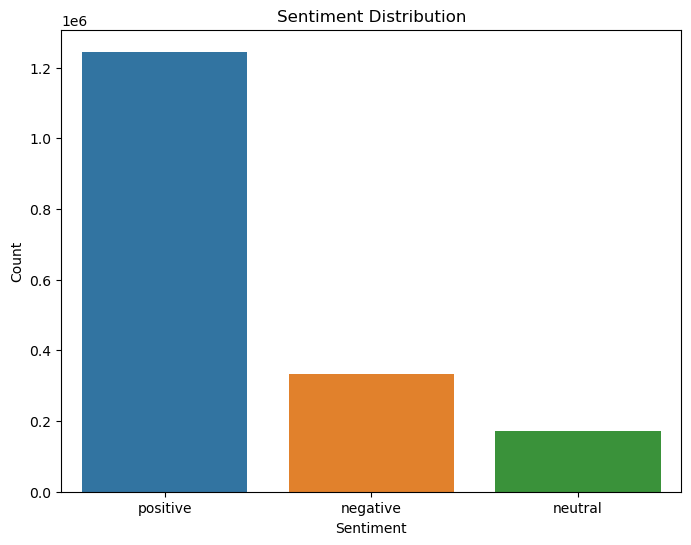

In [8]:
# 1. Analyze the distribution of sentiments
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Convert the token lists back to strings
df['text'] = df['text'].apply(lambda tokens: ' '.join(tokens))
df.head()

In [ ]:
df['text'] = df['text'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) and x.startswith('[') else x)
df.head()

In [9]:
# Function to generate word cloud for a specific sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(df[df['sentiment'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Most Common Words for {sentiment.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()

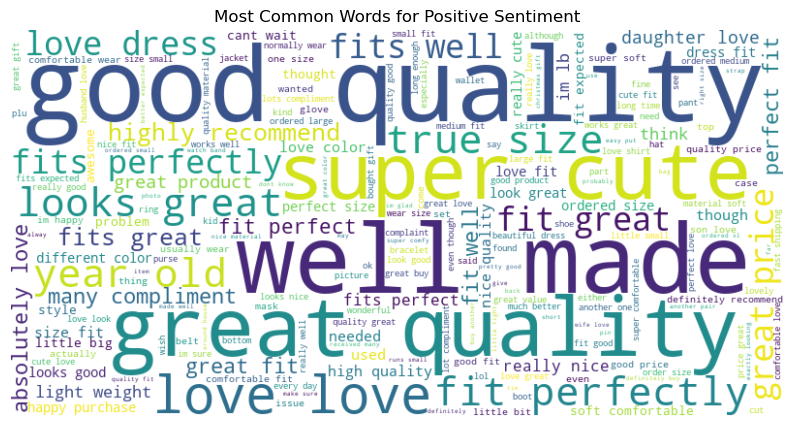

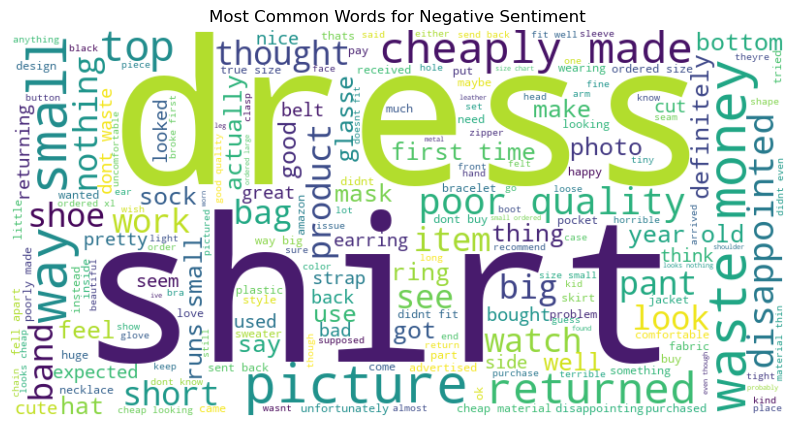

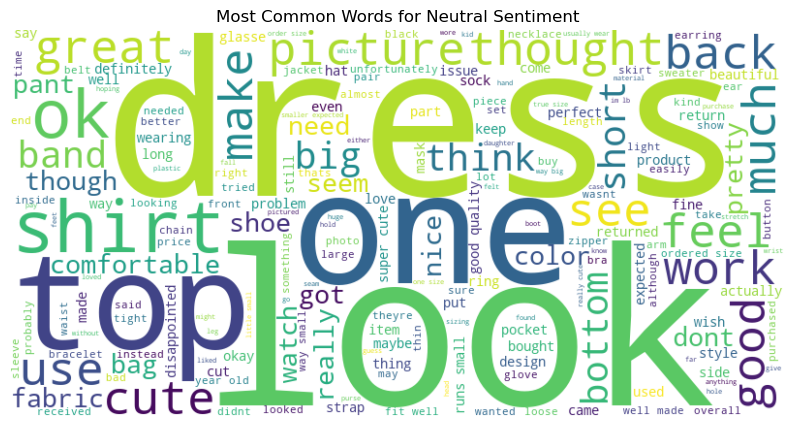

In [10]:
# Generate word clouds for each sentiment
for sentiment in sentiment_counts.index:
    generate_word_cloud(sentiment)

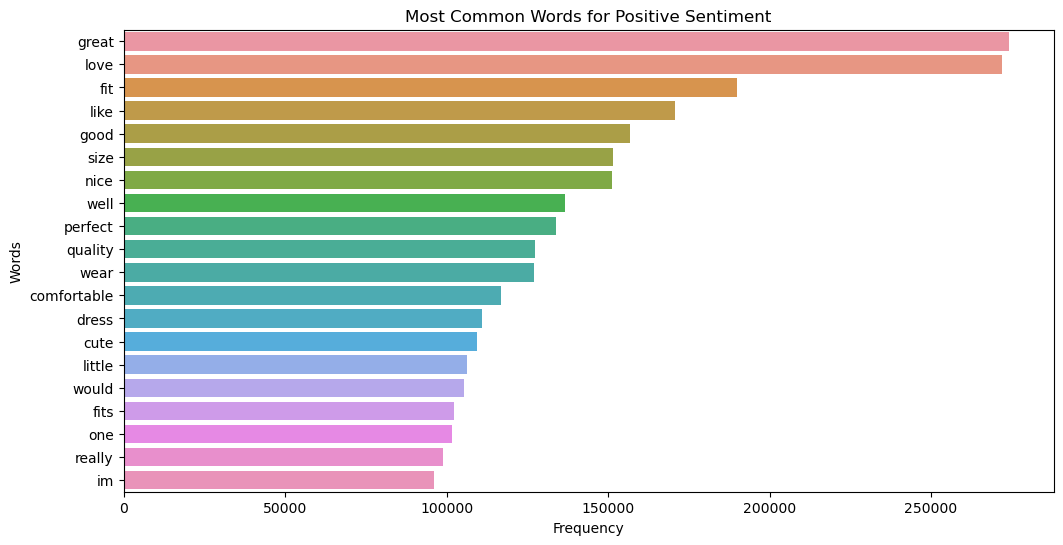

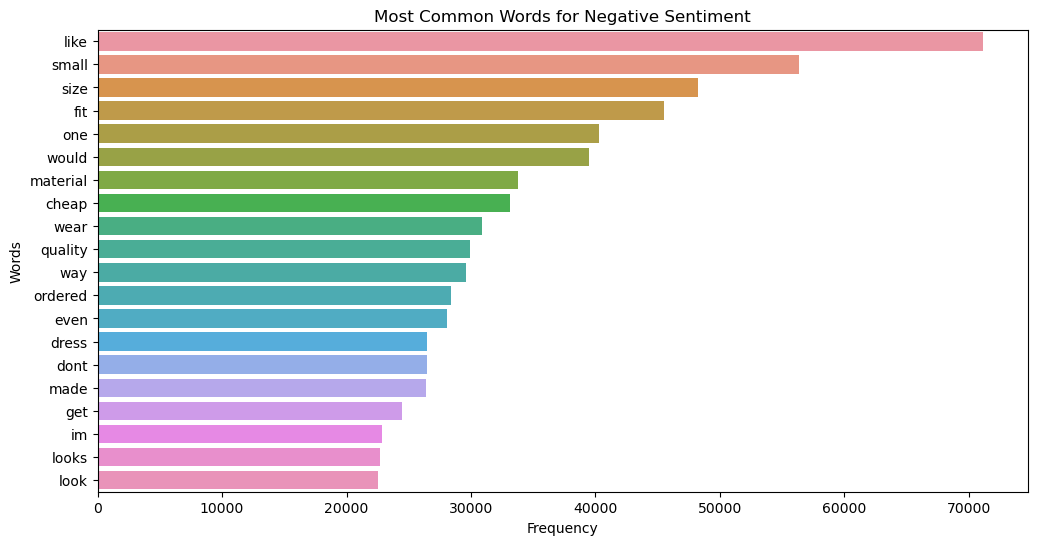

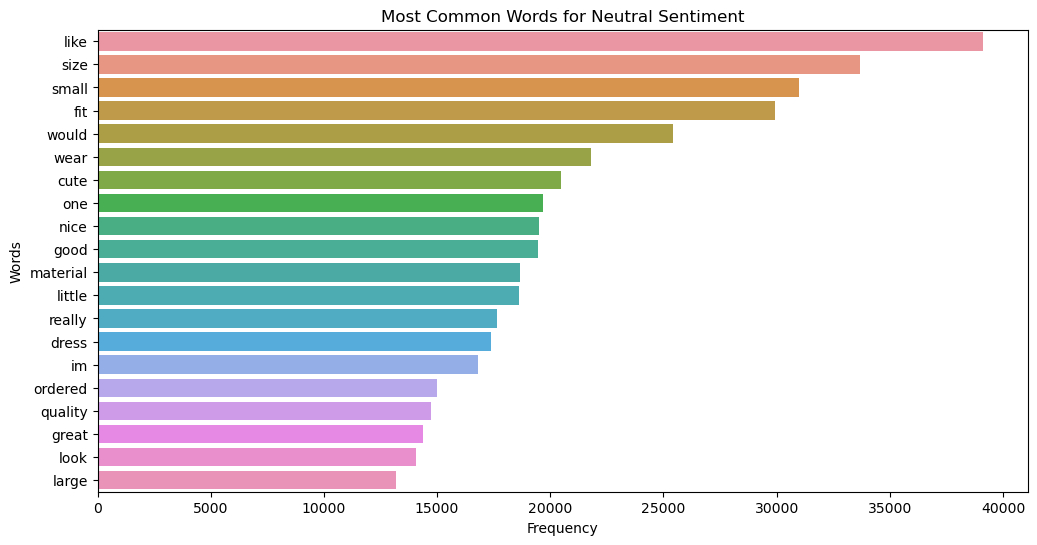

In [11]:
# Function to plot frequency distribution of words for a specific sentiment
def plot_word_frequency(sentiment):
    text = ' '.join(df[df['sentiment'] == sentiment]['text'])
    tokens = nltk.word_tokenize(text)
    freq_dist = FreqDist(tokens)
    common_words = freq_dist.most_common(20)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Most Common Words for {sentiment.capitalize()} Sentiment')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Plot word frequency distribution for each sentiment
for sentiment in sentiment_counts.index:
    plot_word_frequency(sentiment)

                             user_id     text sentiment
count                        1750657  1750657   1750657
unique                       1492964  1475917         3
top     AGZZXSMMS4WRHHJRBUJZI4FZDHKQ     love  positive
freq                             207    18522   1245016
user_id      0
text         0
sentiment    0
dtype: int64
count    1.750657e+06
mean     8.680344e+01
std      1.120098e+02
min      0.000000e+00
25%      2.500000e+01
50%      5.400000e+01
75%      1.070000e+02
max      6.757000e+03
Name: text_length, dtype: float64


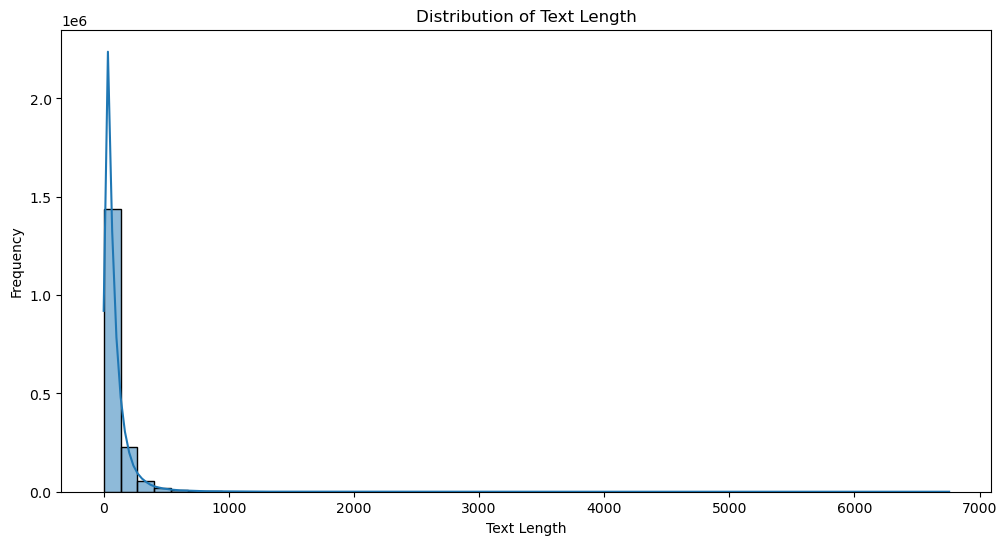

In [12]:
# 3. Identify any patterns or anomalies in the data

# Descriptive statistics
print(df.describe())

# Check for any missing values
print(df.isnull().sum())

# Check the length of reviews
df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe())

# Visualize the length of reviews
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Logistic Regression Model Parameters: {'C': 1}
Logistic Regression Performance:
Accuracy: 0.8357419487507568
Precision: 0.8051939167714768
Recall: 0.8357419487507568
F1 Score: 0.811637323112821
Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.75      0.74     66742
     neutral       0.42      0.13      0.19     34573
    positive       0.88      0.96      0.92    248817

    accuracy                           0.84    350132
   macro avg       0.67      0.61      0.62    350132
weighted avg       0.81      0.84      0.81    350132



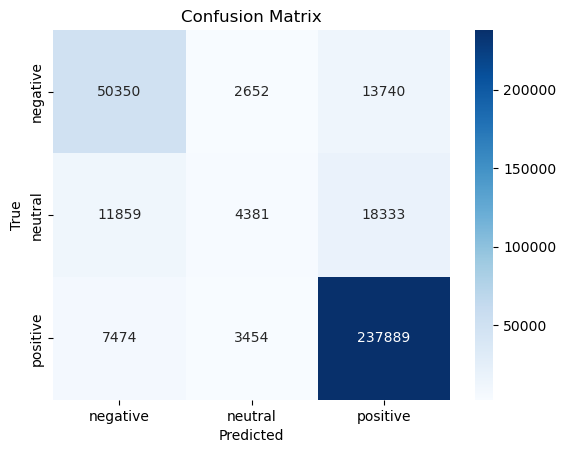

Best Naive Bayes Model Parameters: {'alpha': 0.1}
Naive Bayes Performance:
Accuracy: 0.8066329270103847
Precision: 0.7650610074287119
Recall: 0.8066329270103847
F1 Score: 0.7621719872408869
Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.56      0.65     66742
     neutral       0.39      0.03      0.06     34573
    positive       0.82      0.98      0.89    248817

    accuracy                           0.81    350132
   macro avg       0.66      0.52      0.53    350132
weighted avg       0.77      0.81      0.76    350132



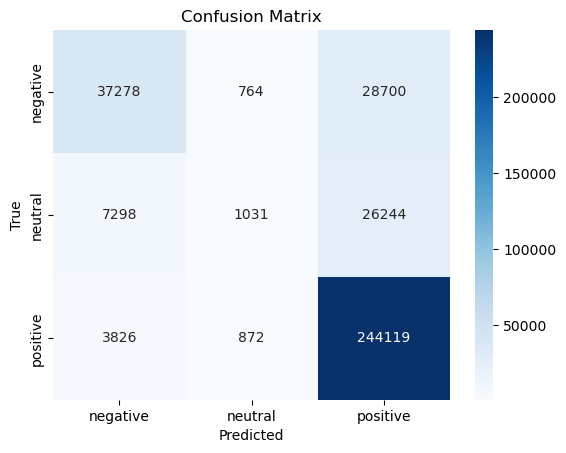

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Prepare the data
X = df['text']
y = df['sentiment']
# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Train and fine-tune Logistic Regression model
lr_model = LogisticRegression(max_iter=200)
lr_parameters = {'C': [0.01, 0.1, 1, 10, 100]}
lr_grid_search = GridSearchCV(lr_model, lr_parameters, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train_tfidf, y_train)
best_lr_model = lr_grid_search.best_estimator_
print("Best Logistic Regression Model Parameters:", lr_grid_search.best_params_)

# Evaluate the best Logistic Regression model
print("Logistic Regression Performance:")
evaluate_model(best_lr_model, X_test_tfidf, y_test)

# Train and fine-tune Naive Bayes model
nb_model = MultinomialNB()
nb_parameters = {'alpha': [0.01, 0.1, 1, 10]}
nb_grid_search = GridSearchCV(nb_model, nb_parameters, cv=5, scoring='accuracy')
nb_grid_search.fit(X_train_tfidf, y_train)
best_nb_model = nb_grid_search.best_estimator_
print("Best Naive Bayes Model Parameters:", nb_grid_search.best_params_)

# Evaluate the best Naive Bayes model
print("Naive Bayes Performance:")
evaluate_model(best_nb_model, X_test_tfidf, y_test)

In [14]:
# Load the test dataset
# Path to the parquet file
file_path = "C:/Users/hp/Downloads/test.gzip"

# Load the parquet file into a DataFrame
df_test = pd.read_parquet(file_path)



In [15]:
df_test.head()

,user_id,text
0,AHVS7EOMX5QA3IK7GGOHRI4TVBSA,I LOVE this shirt. It fits perfect. I am 5'8&q...
1,AG7GUF5JWYMI7YQPEFAQVNMVXMAQ,"nice bracelet , looks good, just as they descr..."
2,AE3RHGNI3VTVPS34AIBSHVA3NV2Q,I’ve used with 5 of my clients and each child ...
3,AHUYGLF7KTFDNWMUVIPD36LA62UQ,Holy cow these guys are huge. I bought a large...
4,AEVT43XROF4Y3PFJYKNLGDN2PMHQ,Super itchy fabric. And it’s the type of fabri...


In [21]:
# Clean and tokenize the test data
df_test['cleaned_text'] = df_test['text'].apply(clean_and_tokenize_text)

# Keep only the desired columns
df_test = df_test[['user_id', 'cleaned_text']]

# Rename the 'tokens' column to 'text'
df_test = df_test.rename(columns={'cleaned_text': 'text'})
df_test.head()
# Vectorize the test text data using the same vectorizer
X_test_tfidf = vectorizer.transform(df_test['text'])

# Predict the sentiment on the test data
df_test['sentiment'] = best_lr_model.predict(X_test_tfidf)

In [22]:
df_test.head()

,user_id,text,sentiment
0,AHVS7EOMX5QA3IK7GGOHRI4TVBSA,love shirt fits perfect ordered ex large fits ...,positive
1,AG7GUF5JWYMI7YQPEFAQVNMVXMAQ,nice bracelet looks good described fast shippi...,positive
2,AE3RHGNI3VTVPS34AIBSHVA3NV2Q,ive used clients child appears like soft snug ...,positive
3,AHUYGLF7KTFDNWMUVIPD36LA62UQ,holy cow guys huge bought large based reviews ...,positive
4,AEVT43XROF4Y3PFJYKNLGDN2PMHQ,super itchy fabric type fabric attracts every ...,negative


In [23]:
# Save the test data with sentiment predictions to a CSV file
output_csv_file_path = 'C:/Users/hp/Downloads/predicted_test.csv'  # Update this with the desired output path
df_test[['user_id', 'text', 'sentiment']].to_csv(output_csv_file_path, index=False)

print(f"Predictions saved to {output_csv_file_path}")

Predictions saved to C:/Users/hp/Downloads/predicted_test.csv


In [25]:
import pickle
# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(best_lr_model, f)

print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.
